# Data Modeling and Analysis

This Notebook will model the data and gather insights. This will include:
- Data Exploration
- Data Visualization
- Conclusions


Notes to self:
Copy over the data from the military notebook and then start the analysis.


## Import Data

In [15]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud
from wordcloud import WordCloud


#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
df = pd.read_csv('../3_ANALYSIS/data/processed_data.csv')

print(df.shape)
df.head()

(2727, 73)


,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.673935,-0.263955,-0.263955,0,1,...,0,1,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.607424,-0.290761,-0.290761,0,1,...,0,1,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.174943,-0.250552,-0.250552,0,1,...,0,1,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,22,5


In [17]:
mh_df = df[df['subreddit'].isin(['schizophrenia', 'bipolar'])]

mh_df.head()

,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
1395,schizophrenia,I think I'm in danger of actually hurting some...,I think I'm going to lose it,[],r/schizophrenia,0.673935,-0.290761,-0.290761,0,1,...,0,0,0,1,0,0,0,0,2,0
1396,schizophrenia,Holidays blow. Brain blows. Got money saved up...,Taking the jump.,[],r/schizophrenia,0.673935,-0.277358,-0.277358,0,1,...,0,0,0,1,0,0,0,0,2,0
1397,schizophrenia,"Hope you’re all having happy, stress free, hol...",Happy Selfie-Sunday!,[],r/schizophrenia,0.673935,-0.263955,-0.263955,0,0,...,0,0,0,0,0,0,0,0,2,0
1398,schizophrenia,This is my first time posting here. I’ve been ...,Merry Christmas and don’t forget to thank your...,[],r/schizophrenia,0.673935,-0.290761,-0.290761,0,0,...,0,0,0,0,0,0,0,0,0,0
1399,schizophrenia,I noticed development of my symptoms today but...,Selfie Sunday,[],r/schizophrenia,0.673935,-0.290761,-0.290761,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
def preprocess_text(text):
    '''
    This function is performing text cleaning in order to prepare the text for NLP analysis.
    This includes:
    - Lowercasing
    - Removing special characters and digits
    - Tokenizing into words
    - Removing stopwords
    - Lemmatization
    
    Returns: Cleaned text
    
    '''
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


In [20]:
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    ''' 
    This function is performing text preprocessing and vectorization for NLP analysis.
    
    Parameters:
    - df: dataframe
    - text_column: column containing text data
    - target_column: column containing target variable
    
    
    Returns: X_train_vect, X_test_vect, y_train, y_test, vectorizer
    '''
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [21]:
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(mh_df)

## Reviewing Aggregate Word Cloud

In [22]:
tdidf_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print(tdidf_df)

       _f   _h  _ia  _qbdc  _zs   aa  aaaaaaaaaaaaa  aaaaaaand  aaaahhhh   ab  \
0     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
2     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
3     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
4     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
...   ...  ...  ...    ...  ...  ...            ...        ...       ...  ...   
1060  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1061  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1062  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1063  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1064  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   

      ...  zipper  zmj  zol

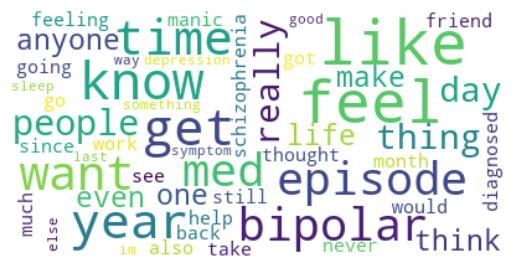

In [39]:
# Sum the TF-IDF scores for each word
word_frequencies = tdidf_df.sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50, random_state=42).generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Training for Logistical Regression Model

In [24]:
# Initialize the model
lrg = LogisticRegression()

# Train the model
lrg.fit(X_train, y_train)


LogisticRegression()

               precision    recall  f1-score   support

      bipolar       0.78      0.88      0.83       150
schizophrenia       0.82      0.68      0.74       117

     accuracy                           0.79       267
    macro avg       0.80      0.78      0.79       267
 weighted avg       0.80      0.79      0.79       267



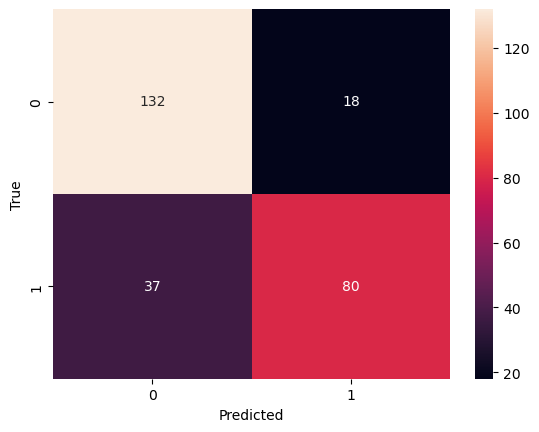

In [25]:
# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #REF: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Plot confusion matrix
cm_lrg = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lrg, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters: ", grid_search.best_params_)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_lr))

Best Parameters:  {'C': 100, 'solver': 'newton-cg'}
               precision    recall  f1-score   support

      bipolar       0.81      0.83      0.82       150
schizophrenia       0.78      0.75      0.77       117

     accuracy                           0.80       267
    macro avg       0.80      0.79      0.79       267
 weighted avg       0.80      0.80      0.80       267



In [29]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_[0]#This is a binary classification problem, so we only have one set of coefficients

for _, class_label in enumerate(lrg.classes_): #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    sorted_indices = np.argsort(class_coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: bipolar
Top Positive Influential Words: ['please', 'abilify', 'name', 'real', 'invega', 'hearing', 'negative', 'away', 'see', 'people', 'doctor', 'hear', 'paranoid', 'symptom', 'psychosis', 'schizophrenic', 'delusion', 'hallucination', 'voice', 'schizophrenia']
Top Negative Influential Words: ['bipolar', 'manic', 'episode', 'mania', 'feel', 'last', 'never', 'feeling', 'anyone', 'mood', 'hypomanic', 'depression', 'med', 'depressed', 'holiday', 'week', 'depressive', 'ever', 'need', 'relationship']

Class: schizophrenia
Top Positive Influential Words: ['please', 'abilify', 'name', 'real', 'invega', 'hearing', 'negative', 'away', 'see', 'people', 'doctor', 'hear', 'paranoid', 'symptom', 'psychosis', 'schizophrenic', 'delusion', 'hallucination', 'voice', 'schizophrenia']
Top Negative Influential Words: ['bipolar', 'manic', 'episode', 'mania', 'feel', 'last', 'never', 'feeling', 'anyone', 'mood', 'hypomanic', 'depression', 'med', 'depressed', 'holiday', 'week', 'depressive', 'ever', '

### Word Clouds for Positive and Negative Posts

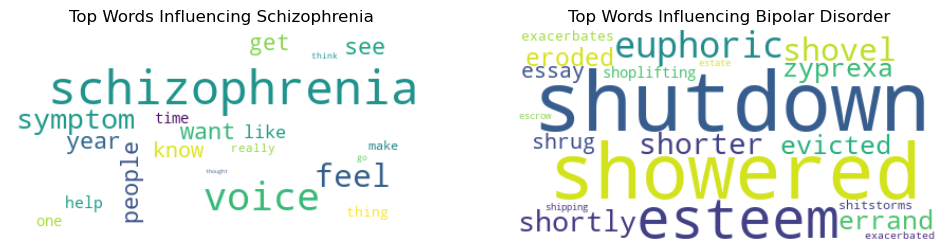

In [41]:
# For Class A (Positive Coefficients)
top_words_sch = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}

# For Class B (Negative Coefficients)
top_words_bipo = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}

# Word Cloud for Class A
wordcloud_sch = WordCloud(background_color='white').generate_from_frequencies(top_words_sch)

# Word Cloud for Class B
wordcloud_bipo = WordCloud(background_color='white').generate_from_frequencies(top_words_bipo)

# Display Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sch, interpolation='bilinear')
plt.title('Top Words Influencing Schizophrenia')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_bipo, interpolation='bilinear')
plt.title('Top Words Influencing Bipolar Disorder')
plt.axis("off")

plt.show()

## Training for Naive Bayes Regression Model

In [30]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

               precision    recall  f1-score   support

      bipolar       0.63      0.97      0.76       150
schizophrenia       0.86      0.26      0.41       117

     accuracy                           0.66       267
    macro avg       0.74      0.62      0.58       267
 weighted avg       0.73      0.66      0.61       267



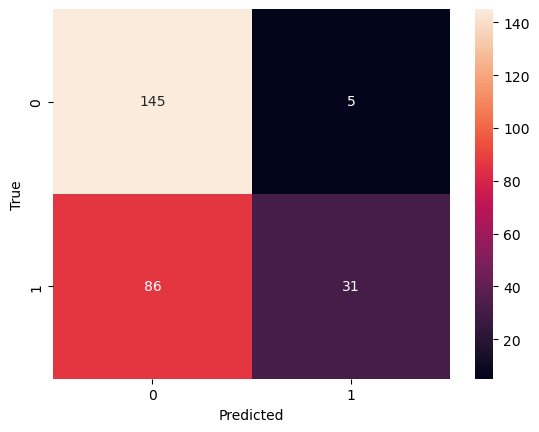

In [31]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_mnb))

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
# Define a parameter grid for GridSearch
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
    }

# Initialize and perform the grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Re-evaluate using the best model
best_model = grid_search.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_mnb))

Best Parameters:  {'alpha': 0.1}
               precision    recall  f1-score   support

      bipolar       0.70      0.88      0.78       150
schizophrenia       0.77      0.51      0.62       117

     accuracy                           0.72       267
    macro avg       0.73      0.70      0.70       267
 weighted avg       0.73      0.72      0.71       267



In [33]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: bipolar
Top Influential Words: ['going', 'feeling', 'one', 'even', 'really', 'thing', 'life', 'anyone', 'day', 'manic', 'want', 'med', 'time', 'know', 'get', 'year', 'episode', 'bipolar', 'like', 'feel']

Class: schizophrenia
Top Influential Words: ['see', 'one', 'help', 'go', 'think', 'thought', 'really', 'make', 'symptom', 'thing', 'year', 'want', 'get', 'time', 'voice', 'know', 'people', 'feel', 'schizophrenia', 'like']



## Training for Random Forest Classifier Model

In [34]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

               precision    recall  f1-score   support

      bipolar       0.78      0.90      0.83       150
schizophrenia       0.84      0.67      0.74       117

     accuracy                           0.80       267
    macro avg       0.81      0.78      0.79       267
 weighted avg       0.80      0.80      0.79       267



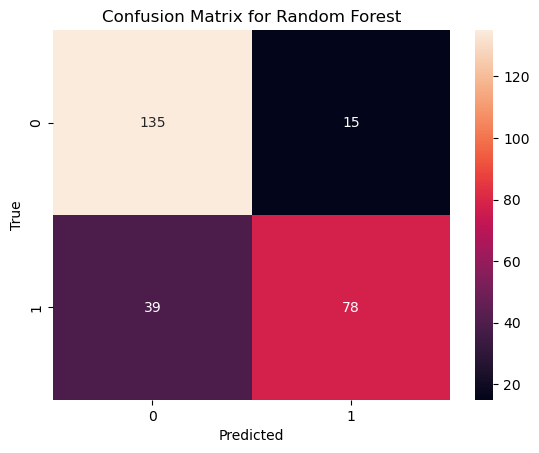

In [35]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features (Not separated by class)

top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Features and Words:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top Features and Words:
schizophrenic: 0.005061369383655066
mood: 0.005383417447534051
depressed: 0.005564450515353737
feeling: 0.005598224829970299
depression: 0.005852726081190688
need: 0.005948285752642429
anyone: 0.005973916949608168
since: 0.006175628881089652
hallucination: 0.006379363311304996
get: 0.006477923801387811
last: 0.006908642196021331
feel: 0.007061893195083161
med: 0.007132525790684307
mania: 0.007459269202922887
year: 0.007919434738538546
voice: 0.00849195608414941
episode: 0.016187369874295553
manic: 0.021517773939219133
bipolar: 0.027749919283576667
schizophrenia: 0.02914703650774928


## Training for KNN Model

In [37]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

               precision    recall  f1-score   support

      bipolar       0.00      0.00      0.00       150
schizophrenia       0.44      1.00      0.61       117

     accuracy                           0.44       267
    macro avg       0.22      0.50      0.30       267
 weighted avg       0.19      0.44      0.27       267



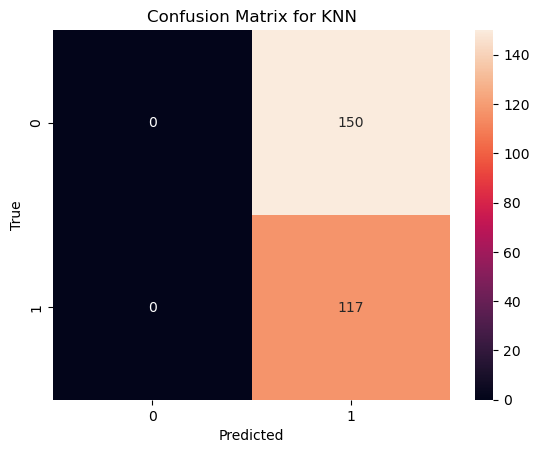

In [38]:
# Make predictions
y_pred_knn = knn.predict(X_test) #Results due to having more than 2 classes/ Considering breaking down into 2 classes

# Print classification report
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()